### OLS with Real Data

In [2]:
import pandas as pd
import numpy as np

In [16]:
from torch.autograd import Variable
import torch

In [3]:
cat=pd.read_csv("catsM.csv")

In [4]:
cat.head()

,Sex,Bwt,Hwt
0,M,2.0,6.5
1,M,2.0,6.5
2,M,2.1,10.1
3,M,2.2,7.2
4,M,2.2,7.6


In [5]:
cat2=cat[['Bwt','Hwt']]

In [9]:
x=cat2.iloc[:,0] ## isolate the first column

In [10]:
x.head()

0    2.0
1    2.0
2    2.1
3    2.2
4    2.2
Name: Bwt, dtype: float64

### Convert pandas columns to Numpy arrays

In [11]:
x=cat2.iloc[:,0].values

In [12]:
print(type(x))

<class 'numpy.ndarray'>


In [20]:
y=cat2.iloc[:,1].values #convert the values of the 2nd column to np

### Convert Numpy to Tensor (Pytorch)

In [18]:
x_np = np.array(x, dtype=np.float32)
x_np = x_np.reshape(-1,1)
x_tensor = Variable(torch.from_numpy(x_np))

In [21]:
y_np = np.array(y, dtype=np.float32)
y_np = y_np.reshape(-1,1)
y_tensor = Variable(torch.from_numpy(y_np))

### Set up OLS Model

In [22]:
import torch.nn as nn

In [24]:
# create class

class LinearRegression(nn.Module):
    
    def __init__(self, input_size, output_size):
        
        # super function
        # it inherits from nn.Module
        # and we can accces everything in nn.Module
        super(LinearRegression, self).__init__()
        
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    


epoch: 0 ==> loss: 143.17591857910156

epoch: 100 ==> loss: 2.577819347381592

epoch: 200 ==> loss: 2.5441694259643555

epoch: 300 ==> loss: 2.5160694122314453

epoch: 400 ==> loss: 2.4926040172576904

epoch: 500 ==> loss: 2.4730091094970703

epoch: 600 ==> loss: 2.456646203994751

epoch: 700 ==> loss: 2.4429821968078613

epoch: 800 ==> loss: 2.4315719604492188

epoch: 900 ==> loss: 2.422043561935425



In [25]:
# define model

input_dim = 1 #response variable
output_dim = 1 #predictor

model = LinearRegression(input_dim, output_dim)

#  calculating the mean squared error loss
mse = nn.MSELoss()

# optimization
learning_rate = 0.02 ##alpha
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration = 1000

for it in range(iteration):
    
    #optimization step
    optimizer.zero_grad()
    
    # forward pass
    result = model(x_tensor)
    
    # calculate loss
    loss = mse(result, y_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # appending the loss in a list
    loss_list.append(loss.data)
    
    # printing the loss every 100th iteration
    if (it%200 == 0):
        print("epoch: {} ==> loss: {}\n".format(it,loss.data))

epoch: 0 ==> loss: 76.66773223876953

epoch: 200 ==> loss: 2.4680893421173096

epoch: 400 ==> loss: 2.43955135345459

epoch: 600 ==> loss: 2.4196512699127197

epoch: 800 ==> loss: 2.4057743549346924



In [27]:
import matplotlib.pyplot as plt


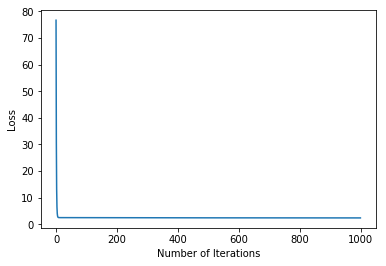

In [28]:
plt.plot(range(iteration), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

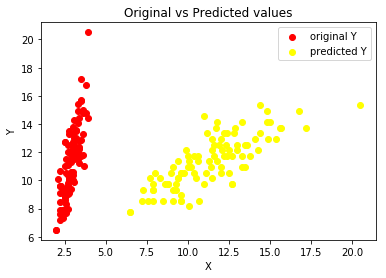

In [30]:
predicted = model(x_tensor).data.numpy()

plt.scatter(x_np, y_np, label="original Y", color="red")
plt.scatter(y_np, predicted, label="predicted Y", color="yellow")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original vs Predicted values")
plt.show()
plt.show()